In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./Downloads/nutrient_data_final.csv')

print(df.describe())

df.isnull().sum()

df.dtypes

       Weight_in_gm  Energy_in_kcal  Energy_in_kj  Protein_in_gm  \
count    133.000000      133.000000    133.000000     133.000000   
mean      55.067669      125.481203    524.804511       3.639098   
std       44.695298       62.845241    262.949167       2.890261   
min        4.000000        8.000000     33.000000       1.000000   
25%       29.000000       86.000000    361.000000       2.000000   
50%       37.000000      112.000000    468.000000       3.000000   
75%       64.000000      159.000000    666.000000       5.000000   
max      186.000000      371.000000   1554.000000      25.000000   

       Carbohydrate_in_gm  Total_dietary_fibre_in_gm  Iron_in_mg  \
count          133.000000                 132.000000  133.000000   
mean            24.383459                   2.290152    2.067669   
std             13.182129                   2.396622    1.750262   
min              2.000000                   0.100000    0.200000   
25%             16.000000                   0.7

Food_name                     object
Measure                       object
Weight_in_gm                   int64
Energy_in_kcal                 int64
Energy_in_kj                   int64
Protein_in_gm                  int64
Carbohydrate_in_gm             int64
Total_sugar_in_gm             object
Total_dietary_fibre_in_gm    float64
Total_fat_in_gm               object
Saturated_fat_in_gm           object
Cholesterol_in_mg             object
Calcium_in_mg                 object
Iron_in_mg                   float64
Sodium_in_mg                  object
Potassium_in_mg              float64
Magnesium_in_mg              float64
Phosphorus_in_mg             float64
Thiamin_in_mg                 object
Riboflavin_in_mg              object
Niacin_NE                    float64
Folate_DFE                   float64
dtype: object

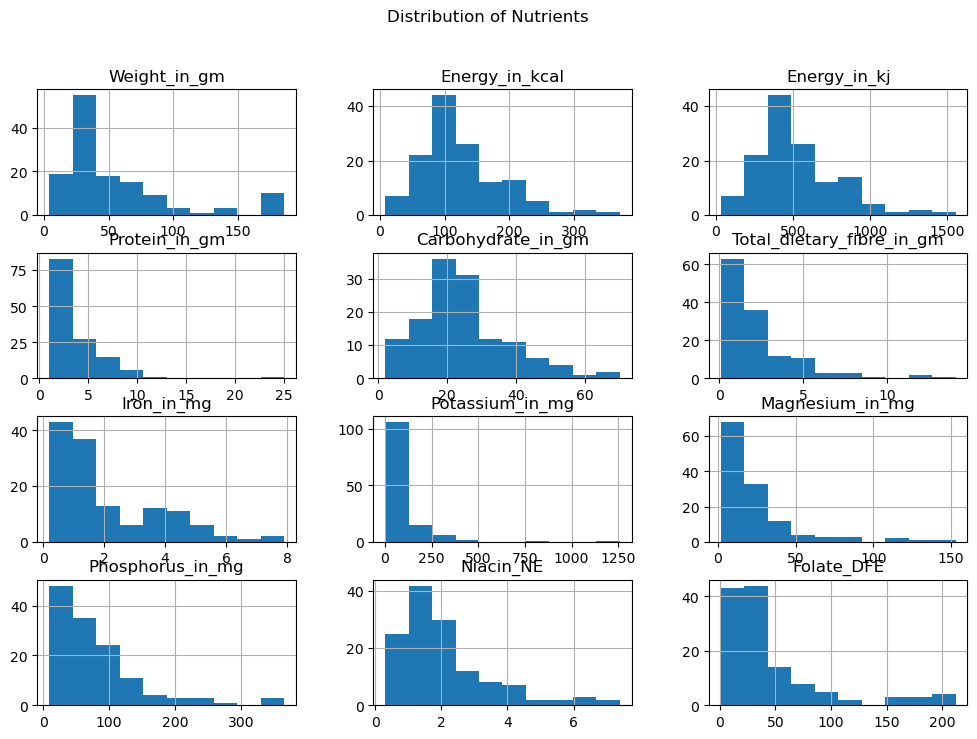

In [7]:
# Plot histograms for each nutrients
df.hist(figsize=(12,8))
plt.suptitle('Distribution of Nutrients')
plt.show()

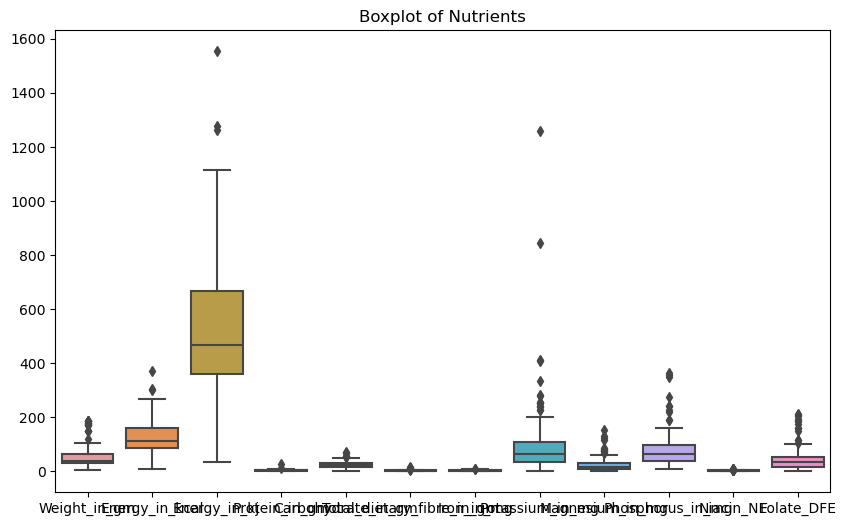

In [9]:
# Plot boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Nutrients')
plt.show()

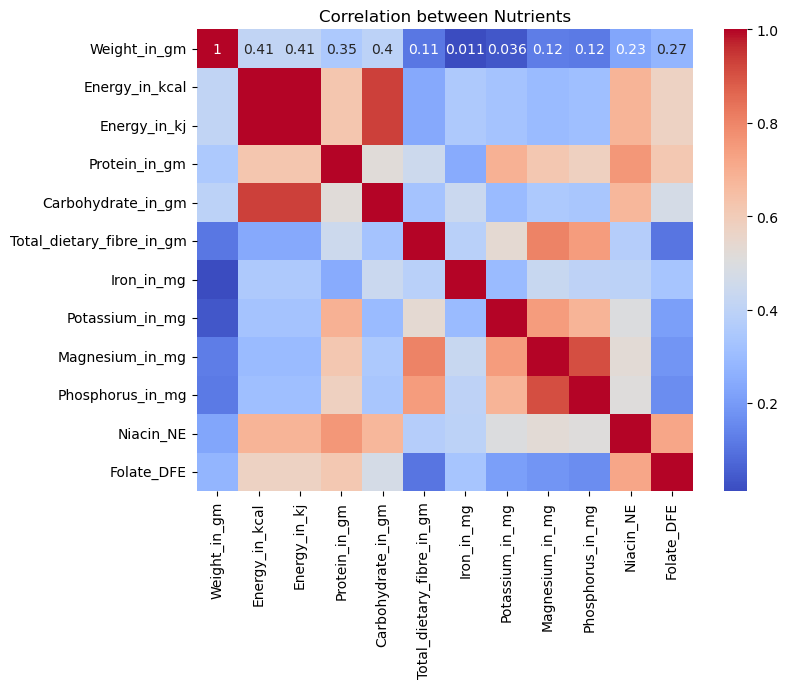

In [16]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Nutrients')
plt.show()

In [17]:
# Impute missing values with mean
df.fillna(df.mean(), inplace=True)

TypeError: can only concatenate str (not "int") to str

EDA of Image data

In [22]:
import os
from PIL import Image
import numpy as np

# Path to your data set
file_path = './Downloads/test_dataset/training/Bread'

# List all image files in the directory
image_files = [os.path.join(file_path, f) for f in os.listdir(file_path) if f.endswith(('jpg','png','jpeg'))]
print(f"Total number of images: {len(image_files)}")

# Check the dimensions of the first few images
for img_file in image_files[:5]:
    img = Image.open(img_file)
    print(f"Image: {img_file}: size={img.size}, mode={img.mode}")

Total number of images: 994
Image: ./Downloads/test_dataset/training/Bread\0.jpg: size=(512, 512), mode=RGB
Image: ./Downloads/test_dataset/training/Bread\1.jpg: size=(512, 512), mode=RGB
Image: ./Downloads/test_dataset/training/Bread\10.jpg: size=(512, 341), mode=RGB
Image: ./Downloads/test_dataset/training/Bread\100.jpg: size=(512, 512), mode=RGB
Image: ./Downloads/test_dataset/training/Bread\101.jpg: size=(512, 512), mode=RGB


Class distribution for labeled data set

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


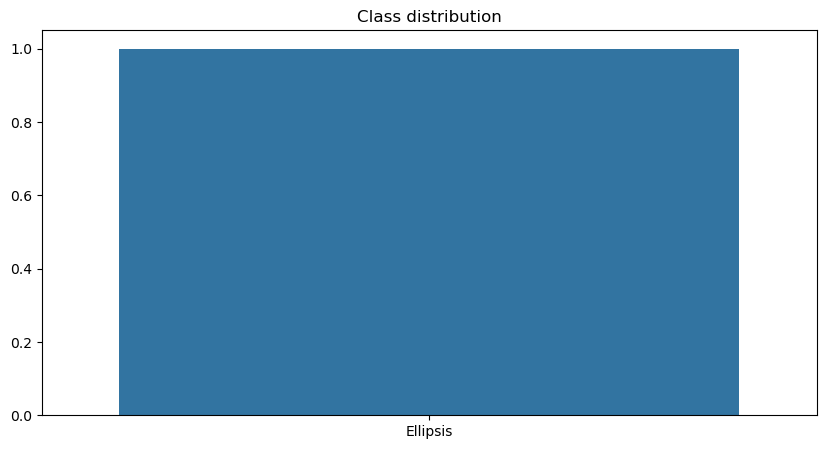

In [23]:
from collections import Counter

# Assuming labels are stored in a separate list
labels = [...] # Replace with your actual labels list
label_counts = Counter(labels)

# Plot class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title('Class distribution')
plt.show()

In [24]:
import random 
import cv2

def show_random_images(image_files, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        image_file = random.choice(image_files)
        img = cv2.imread(img_file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

ModuleNotFoundError: No module named 'cv2'

In [ ]:
show_random_images(image_files)

In [ ]:
def detect_blur(image_path, threshold=100):
    img = cv2.imread(image_path, 0) # Read in grayscale
    laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
    return laplacian_var < threshold # Lower variance means more blur

blurred_images= [img for img in image_files if detect_blur(img)]
print(f"Number of blurred images: {len(blurred_images)}")

In [ ]:
def check_brightness(image_path):
    img = cv2.imread(image_path, 0) # Read in grayscale
    brightness = np.mean(img) # Average pixel intensity
    return brightness

brightness_values = [check_brightness(img) for img in image_files]
plt.hist(brightness_values, bins=30)
plt.title('Brightness Distribution')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

img = cv2.imread(image_files[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, 0)

# Generate augmented images
augmented = datagen.flow(img)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    aug_img = next(augmented)[0].astype('uint8')
    plt.imshow(aug_img)
    plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224)) # Resize for VGG16
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features

# Extract features for a random sample
sample_features = [extract_features(img) for img in random.sample(image_files, 10)]

In [ ]:
def check_corrupt_images(image_files):
    corrupt_images = []
    for img_file in image_files:
        try:
            img = Image.open(img_file)
            img.verify() # Check if the image file is valid
        except (IOError, SyntaxError) as e:
            corrupt_images.append(img_file)
    return corrupt_images

corrupt_images = check_corrupt_images(image_files)
print(f"Corrupt images: {len(corrupt_images)}")